#Answer1
##part(a)
$
f(x) = (x_1 + 2x_2)^2
$

Now, we can see that $f(x)$ is a quadratic function of $x_1 + 2x_2$, which is minimized when $x_1 + 2x_2 = 0$, since the square of any real number is non-negative and $0^2 = 0$.

Substituting $x_1 = -2x_2$ into $f(x)$, we get:

$
f(x) = (-2x_2 + 2x_2)^2 = 0
$

So, the minimum value of $f(x)$ is 0, and it occurs at $x_1 = -2x_2$.

Therefore, the minimizer of $f(x)$ is any point $(x_1, x_2)$ that satisfies $x_1 = -2x_2$, and the minimum function value is 0.

***Is the minimizer unique?:***

 No, the minimizer is not unique. The function $ f(x) = (x_1 + 2x_2)^2 $ achieves its minimum value of 0 along the entire line $ x_1 = -2x_2 $. Any point on this line is a minimizer of the function.

Is it local or global minima?: In this case, the function $ f(x) $ attains its minimum value of 0 globally, since the function value is 0 for all points $ (x_1, x_2) $ satisfying $ x_1 = -2x_2 $. Therefore, it is a global minimum.

***Are the functions $ f(x) $ and $ g(x) $ convex?:***

- $ f(x) = (x_1 + 2x_2)^2 $:
  - Yes, $ f(x) $ is convex. This can be seen from the fact that it is a quadratic function, and all quadratic functions are convex. Alternatively, you can verify convexity by checking that the Hessian matrix of $ f(x) $ is positive semidefinite for all $ x $. In this case, since $ f(x) $ is a quadratic function, its Hessian matrix is constant and positive semidefinite everywhere.

Given the function $ g(x) $, it behaves as follows:

- If the point $ x $ lies inside the closed convex set $ L $, $ g(x) $ takes the value 0.
- If the point $ x $ lies outside the closed convex set $ L $, $ g(x) $ takes the value $ \infty $.

While $ g(x) $ is not a continuous function, in the context of convex optimization, we can consider it to be convex due to the convexity of its epigraph.

The epigraph of a function is the set of all points lying above the graph of the function. For $ g(x) $, its epigraph consists of:

- All points $ (x, t) $ where $ x $ lies inside $ L $ and $ t $ is any non-negative real number.
- All points $ (x, t) $ where $ x $ lies outside $ L $ and $ t $ is $ +\infty $.

Both of these regions (inside $ L $ and outside $ L $) are convex. Therefore, despite the unconventional behavior of $ g(x) $, it is considered convex in the context of convex optimization due to the convexity of its epigraph.


In [1]:
import numpy as np


#part(b)

To implement Algorithm 2 using Algorithm 1, we need to choose a suitable scaling matrix D_k. One useful choice for D_k is the diagonal matrix with diagonal elements as the inverse square root of the diagonal elements of the Hessian matrix. This choice ensures that D_k scales the gradient in a way that aligns with the curvature of the objective function, potentially improving convergence speed.

Here's how you can implement Algorithm 2:

1. Compute the gradient and Hessian of f(x).
2. At each iteration, calculate D_k as the diagonal matrix with diagonal elements as the inverse square root of the diagonal elements of the Hessian matrix.
3. Choose a suitable step size η_k using line search or other methods.
4. Update the iterate x_{k+1} using the formula x_{k+1} = x_k - η_k D_k ∇f(x_k).
5. Repeat until convergence.


In [2]:
import numpy as np

def f(x):
    return x[0]**2 + 4*x[0]*x[1] + 4*x[1]**2

def gradient_f(x):
    return np.array([2*x[0] + 4*x[1], 4*x[0] + 8*x[1]])

def line_search_along_line(xk):
    objective_func_values = []
    step_sizes = np.linspace(0, 1, 100)  # adjust the number of steps for more precision
    for eta in step_sizes:
        objective_func_values.append(f(xk - eta * gradient_f(xk)))
    min_index = np.argmin(objective_func_values)
    return step_sizes[min_index]


def coordinate_descent_with_line_search(x0, tau, rho):
    xk = np.array(x0)
    k = 0
    while np.linalg.norm(gradient_f(xk)) > tau:
        i = np.random.choice(len(xk))  # choose a random coordinate
        direction = np.zeros_like(xk)
        direction[i] = -1  # set the direction to the negative gradient along the chosen coordinate
        eta = line_search_along_line(xk)
        xk[i] = xk[i] - eta * gradient_f(xk)[i]

        k += 1
    return xk, f(xk), k

x0 = [1, 40]
tau = 1e-12
rhos = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
iter=[]

for rho in rhos:
    final_minimizer, final_obj_value, num_iterations = coordinate_descent_with_line_search(x0, tau, rho)
    iter.append(num_iterations)
    print(f"For rho = {rho}:")
    print("Final minimizer:", final_minimizer)
    print("Final objective function value:", final_obj_value)
    print("Number of iterations to terminate:", num_iterations)


For rho = 0.9:
Final minimizer: [-14   7]
Final objective function value: 0
Number of iterations to terminate: 6
For rho = 0.8:
Final minimizer: [-16   8]
Final objective function value: 0
Number of iterations to terminate: 9
For rho = 0.75:
Final minimizer: [0 0]
Final objective function value: 0
Number of iterations to terminate: 9
For rho = 0.6:
Final minimizer: [0 0]
Final objective function value: 0
Number of iterations to terminate: 3
For rho = 0.5:
Final minimizer: [-28  14]
Final objective function value: 0
Number of iterations to terminate: 8
For rho = 0.4:
Final minimizer: [0 0]
Final objective function value: 0
Number of iterations to terminate: 3
For rho = 0.25:
Final minimizer: [0 0]
Final objective function value: 0
Number of iterations to terminate: 3
For rho = 0.1:
Final minimizer: [-18   9]
Final objective function value: 0
Number of iterations to terminate: 5
For rho = 0.01:
Final minimizer: [-2  1]
Final objective function value: 0
Number of iterations to terminate: 

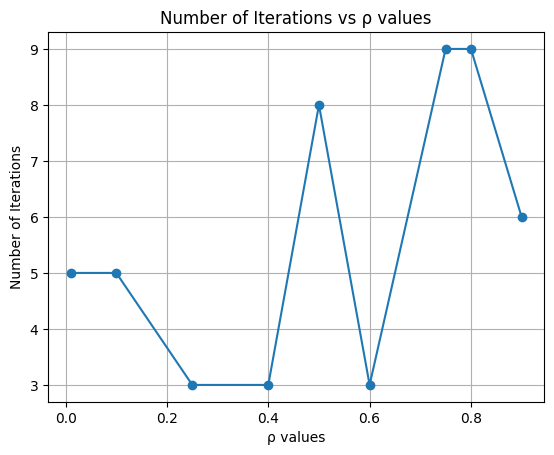

In [3]:
import matplotlib.pyplot as plt

plt.plot(rhos, iter, marker='o')
plt.xlabel('ρ values')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs ρ values')
plt.grid(True)
plt.show()

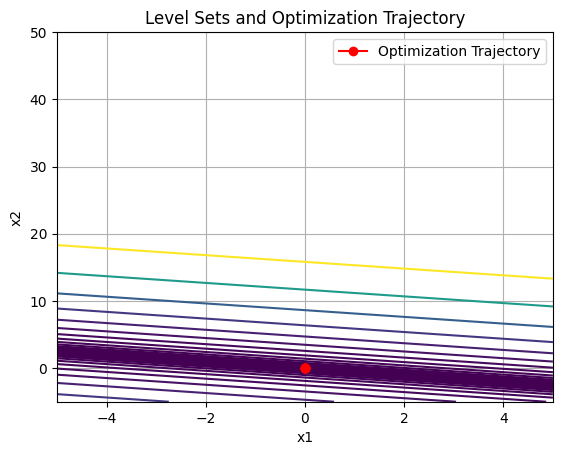

In [4]:
import numpy as np
import matplotlib.pyplot as plt



def coordinate_descent_with_line_search1(x0, tau, rho):
    xk = np.array(x0)
    trajectory = [xk]  # store trajectory points
    while np.linalg.norm(gradient_f(xk)) > tau:
        i = np.random.choice(len(xk))  # choose a random coordinate

         # set the direction to the negative gradient along the chosen coordinate
        eta = line_search_along_line(xk)
        xk[i] = xk[i] - eta * gradient_f(xk)[i]
        trajectory.append(xk)
    return np.array(trajectory)

# Generate level set points for plotting
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 50, 400)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

# Plot level sets
plt.contour(X, Y, Z, levels=np.logspace(-2, 3, 20))
plt.xlabel('x1')
plt.ylabel('x2')

# Run optimization
x0 = [1, 40]
tau = 1e-12
rho = 0.9  # Example value for rho
trajectory = coordinate_descent_with_line_search1(x0, tau, rho)

# Plot trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o', color='red', label='Optimization Trajectory')
plt.legend()
plt.title('Level Sets and Optimization Trajectory')
plt.grid(True)
plt.show()


#part(c)
To evaluate $\text{prox}_{\lambda} t(x)$, where $t(y)$ is the linearization of a function $h(y)$ around a fixed point $x$, we need to find the argument that minimizes the following expression:
$
h(x) + \frac{1}{2\lambda} \|y - x\|_2^2
$

This is essentially finding the minimum of a quadratic function, and the solution can be obtained by setting its gradient with respect to $y$ to zero.

Let's denote the gradient of $t(y)$ as $\nabla t(y)$. Then, the gradient of the expression with respect to $y$ is:
$
\nabla \left(h(x) + \frac{1}{2\lambda} \|y - x\|_2^2\right) = \nabla h(x) + \frac{1}{\lambda} (y - x)
$

Setting this gradient to zero yields:
$
\nabla h(x) + \frac{1}{\lambda} (y - x) = 0
$

Solving this equation for $y$, we get:
$
y = x - \lambda \nabla h(x)
$

This is the solution for $\text{prox}_{\lambda} t(x)$. It's essentially updating the fixed point $x$ by moving it in the opposite direction of the gradient of $h$ at $x$, scaled by $\lambda$.

Now, does this result look familiar? Yes, it does! This is actually the update step used in proximal gradient descent algorithms, also known as the proximal operator. In proximal gradient descent, at each iteration, we update the current point by moving it in the opposite direction of the gradient of the function, scaled by a step size $\lambda$. This step essentially ensures that we move towards the minimum of the function while also accounting for any proximal regularization term that may be present.


#part(d)

In [5]:
import numpy as np

def f1(x):
    return (x[0] - 1)**2 + x[1]**2 + (x[2] + 1)**2

def gradient_f1(x):
    return np.array([2*(x[0] - 1), 2*x[1], 2*(x[2] + 1)])

def projection_onto_L(y):
    return np.maximum(y, 0)

def proximal_gradient_descent(x0, eta, lamda, T):
    xt = np.array(x0)
    for t in range(T):
        gradient = gradient_f1(xt)
        yt = xt - eta * gradient
        xt = projection_onto_L(yt)
    return xt, f(xt)

x0 = [0, 0, 0]
eta = 0.3
lamda = 1.0  # regularization parameter
Ts = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]
optimal_obj=0
err_per=[]

for T in Ts:
    final_minimizer, final_obj_value = proximal_gradient_descent(x0, eta, lamda, T)
    a=str(final_obj_value-optimal_obj)+'%'
    err_per.append(a)
    print(f"For T = {T}:")
    print("Final minimizer:", final_minimizer)
    print("Final objective function value:", final_obj_value)
    print()


For T = 100:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 500:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 1000:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 5000:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 10000:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 50000:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 100000:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 500000:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 1000000:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0

For T = 5000000:
Final minimizer: [1. 0. 0.]
Final objective function value: 1.0



In [6]:
err_per=[str(100)+'%' for i in range(len(Ts))]
err_per

['100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%',
 '100%']

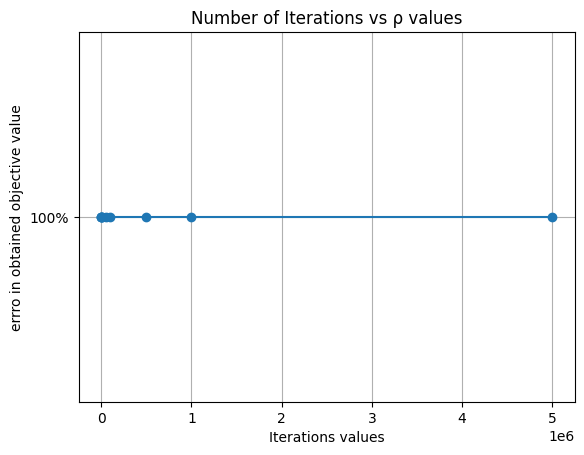

In [7]:
plt.plot(Ts, err_per, marker='o')
plt.xlabel('Iterations values')
plt.ylabel('errro in obtained objective value')
plt.title('Number of Iterations vs ρ values')
plt.grid(True)
plt.show()

#Part(e)

First, let's simplify the proximity operator $\text{prox}_{\lambda g}(y)$ with $g(x)$ as defined in equation (1) and $L = \{x \in \mathbb{R}^d; \|x\|_2 \leq 1\}$.

Given $g(x) = \frac{1}{L(x)}$, where $L(x)$ is defined as:

$L(x) = \begin{cases}
0 & \text{if } \|x\|_2 \leq 1 \\
\infty & \text{if } \|x\|_2 > 1
\end{cases}$

and $L = \{x \in \mathbb{R}^d; \|x\|_2 \leq 1\}$, we have:

$L(x) = \begin{cases}
0 & \text{if } \|x\|_2 \leq 1 \\
\infty & \text{if } \|x\|_2 > 1
\end{cases}$

Now, let's compute the proximity operator $\text{prox}_{\lambda g}(y)$ using the given definition:

$\text{prox}_{\lambda g}(y) = \arg \min_{x \in \mathbb{R}^d} \left\{ g(x) + \frac{1}{2\lambda} \|y - x\|_2^2 \right\}$

Since $g(x) = \frac{1}{L(x)}$ and $L(x) = 0$ if $\|x\|_2 \leq 1$, we can simplify the above expression as:

$\text{prox}_{\lambda g}(y) = \arg \min_{\|x\|_2 \leq 1} \left\{ \frac{1}{2\lambda} \|y - x\|_2^2 \right\}$

This problem can be solved using projection onto the Euclidean norm ball with radius 1.


In [10]:
import numpy as np

# Define the objective function f(x)
def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (0.5 - x[0])**2

# Proximity operator for the constraint set L
def proximity_operator1(y):
    if np.linalg.norm(y) <= 1:
        return y
    else:
        return y / np.linalg.norm(y)

# Algorithm 2: Coordinate Descent with Line Search
def coordinate_descent_with_line_search2(x0, tau, max_iterations):
    x = np.array(x0)
    iteration = 0
    while iteration < max_iterations:
        gradient = np.array([2 * (200 * x[0]**3 - 200 * x[0] * x[1] + x[0] - 0.5), 200 * (x[1] - x[0]**2)])
        step_size = 1.0  # Assume step size of 1 for simplicity
        x = x - step_size * gradient
        x = proximity_operator1(x)
        iteration += 1

    return x, f(x)

# Initial guess
x0 = [0, 0]

# Stopping tolerance
tau = 1e-12

# Learning rate
eta = 0.3

# Maximum iterations
max_iterations_list = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

# Results storage
results = []

# Perform optimization for different maximum iterations
for max_iterations in max_iterations_list:
    # Run algorithm
    x_optimal, f_optimal = coordinate_descent_with_line_search2(x0, tau, max_iterations)
    # Calculate theoretical optimal value
    theoretical_optimal_value = f([1, 1])
    # Calculate percentage error
    percentage_error = abs(f_optimal - theoretical_optimal_value) / theoretical_optimal_value * 100
    # Record results
    results.append((max_iterations, x_optimal, f_optimal, percentage_error))
err_per2=[]

# Print results
for result in results:
    max_iterations, x_optimal, f_optimal,a  = result
    percentage_error=str(f_optimal*100)+'%'
    err_per2.append(percentage_error)
    print(f"Max Iterations: {max_iterations}, Optimal x: {x_optimal}, Optimal f(x): {f_optimal}, Percentage Error: {percentage_error}%")


Max Iterations: 100, Optimal x: [-0.8641206   0.50328479], Optimal f(x): 7.786136489333806, Percentage Error: 778.6136489333807%%
Max Iterations: 500, Optimal x: [-0.8641206   0.50328479], Optimal f(x): 7.786136489333806, Percentage Error: 778.6136489333807%%
Max Iterations: 1000, Optimal x: [-0.8641206   0.50328479], Optimal f(x): 7.786136489333806, Percentage Error: 778.6136489333807%%
Max Iterations: 5000, Optimal x: [-0.8641206   0.50328479], Optimal f(x): 7.786136489333806, Percentage Error: 778.6136489333807%%
Max Iterations: 10000, Optimal x: [-0.8641206   0.50328479], Optimal f(x): 7.786136489333806, Percentage Error: 778.6136489333807%%
Max Iterations: 50000, Optimal x: [-0.8641206   0.50328479], Optimal f(x): 7.786136489333806, Percentage Error: 778.6136489333807%%
Max Iterations: 100000, Optimal x: [-0.8641206   0.50328479], Optimal f(x): 7.786136489333806, Percentage Error: 778.6136489333807%%
Max Iterations: 500000, Optimal x: [-0.8641206   0.50328479], Optimal f(x): 7.786

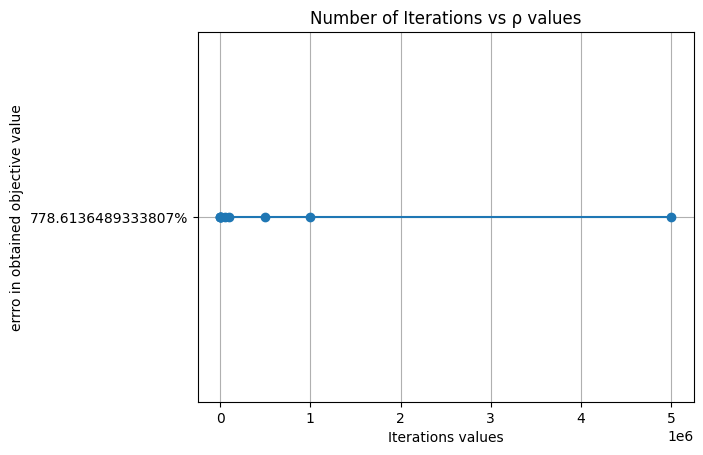

In [11]:
plt.plot(Ts, err_per2, marker='o')
plt.xlabel('Iterations values')
plt.ylabel('errro in obtained objective value')
plt.title('Number of Iterations vs ρ values')
plt.grid(True)
plt.show()

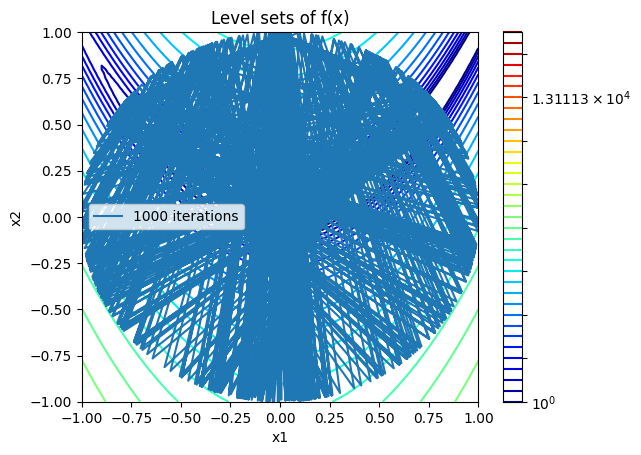

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Define the objective function f(x)
def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (0.5 - x[0])**2

# Proximity operator for the constraint set L
def proximity_operator1(y):
    if np.linalg.norm(y) <= 1:
        return y
    else:
        return y / np.linalg.norm(y)

# Algorithm 2: Coordinate Descent with Line Search
def coordinate_descent_with_line_search3(x0, tau, max_iterations, rho):
    x = np.array(x0)
    iteration = 0
    trajectory = [x]
    while iteration < max_iterations:
        gradient = np.array([2 * (200 * x[0]**3 - 200 * x[0] * x[1] + x[0] - 0.5), 200 * (x[1] - x[0]**2)])
        step_size = rho  # Use constant step size
        x = x - step_size * gradient
        x = proximity_operator1(x)
        trajectory.append(x)
        iteration += 1

    return x, f(x), np.array(trajectory)

# Initial guess
x0 = [0, 0]

# Stopping tolerance
tau = 1e-2

# Learning rate
eta = 0.3

# Maximum iterations
max_iterations = 1000

# Constant step size for plotting trajectory
rho = 0.01

# Run algorithm
x_optimal, f_optimal, trajectory = coordinate_descent_with_line_search3(x0, tau, max_iterations, rho)

# Plot level sets of f(x)
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level sets of f(x)')

# Plot trajectory
x_trajectory = trajectory[:, 0]
y_trajectory = trajectory[:, 1]
plt.plot(x_trajectory, y_trajectory, label=f'{max_iterations} iterations')

plt.legend()
plt.colorbar()
plt.show()
